## Calculation of estimated Glycemic Index (Goni et al., Gandfield et al.)

### Dependencies
- Tidyverse - dplyr, tidyr, ggplot2 - `install.packages('tidyverse', dependencies = TRUE)`
- viridis - `install.packages('viridis', dependencies = TRUE)`
- hbrthemes - `install.packages('hbrthemes', dependencies = TRUE)`
- mosaic - `install.packages('mosaic', dependencies = TRUE)`

First Start with Importing start hydrolysis data from a CSV file

In [1]:
hydrolysis_data = read.csv("../datasets/experimental/glycaemic-index-karabee-joha.csv");

In [2]:
hydrolysis_data

time,sample,starch_release
<int>,<chr>,<dbl>
0,Bread,0.00
30,Bread,57.58
60,Bread,75.65
90,Bread,80.14
120,Bread,81.63
150,Bread,82.54
180,Bread,82.54
0,Kon joha,0.00
30,Kon joha,44.25


The file contains starch hydrolysis % over time in the experiment of two rice cultivars and bread which will be used as reference food

Following code will display summary of data

In [3]:
summary(hydrolysis_data)

      time        sample          starch_release 
 Min.   :  0   Length:35          Min.   : 0.00  
 1st Qu.: 30   Class :character   1st Qu.:44.92  
 Median : 90   Mode  :character   Median :49.05  
 Mean   : 90                      Mean   :46.36  
 3rd Qu.:150                      3rd Qu.:55.62  
 Max.   :180                      Max.   :82.54  

Lets plot the data for instant visualisation using GGPLOT2

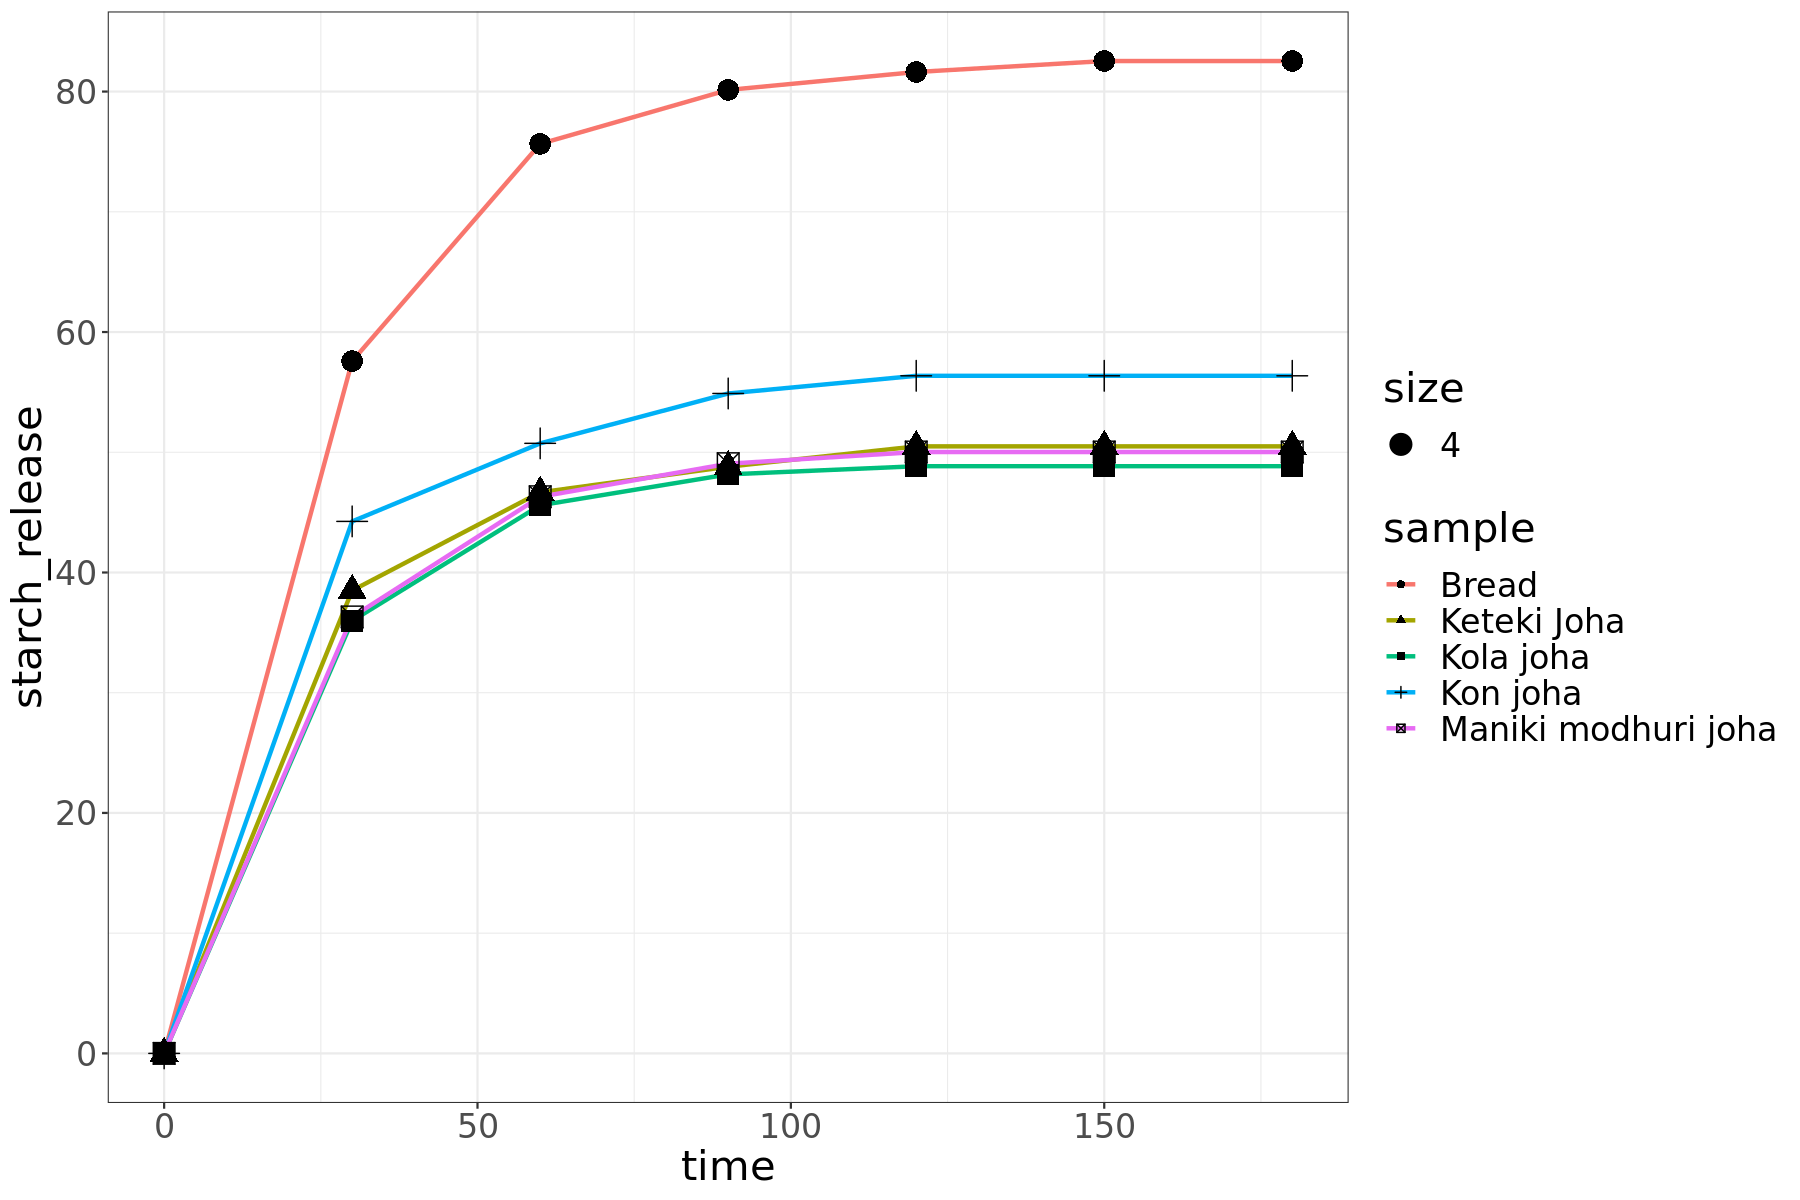

In [5]:
library('ggplot2')
options(repr.plot.width = 12, repr.plot.height = 8, repr.plot.res = 150)
hydrolysis_plot = ggplot(hydrolysis_data, aes(x=time, y=starch_release)) + 
  geom_line(size=1, aes(colour =sample)) +
  geom_point(aes(shape = sample, size=4)) +
#  geom_point(aes(shape = sample, size=time)) + # for marker size scale over time 
  theme_bw() +
theme(text = element_text(size=20)) 

hydrolysis_plot

following plot the hydrolysis curves in Area plot

**Viridis** library will be used for loading responsive color pelletes

**hrbrthemes** library will be used for applying responsive themes to ggplot2

In [9]:
suppressMessages(library(viridis))

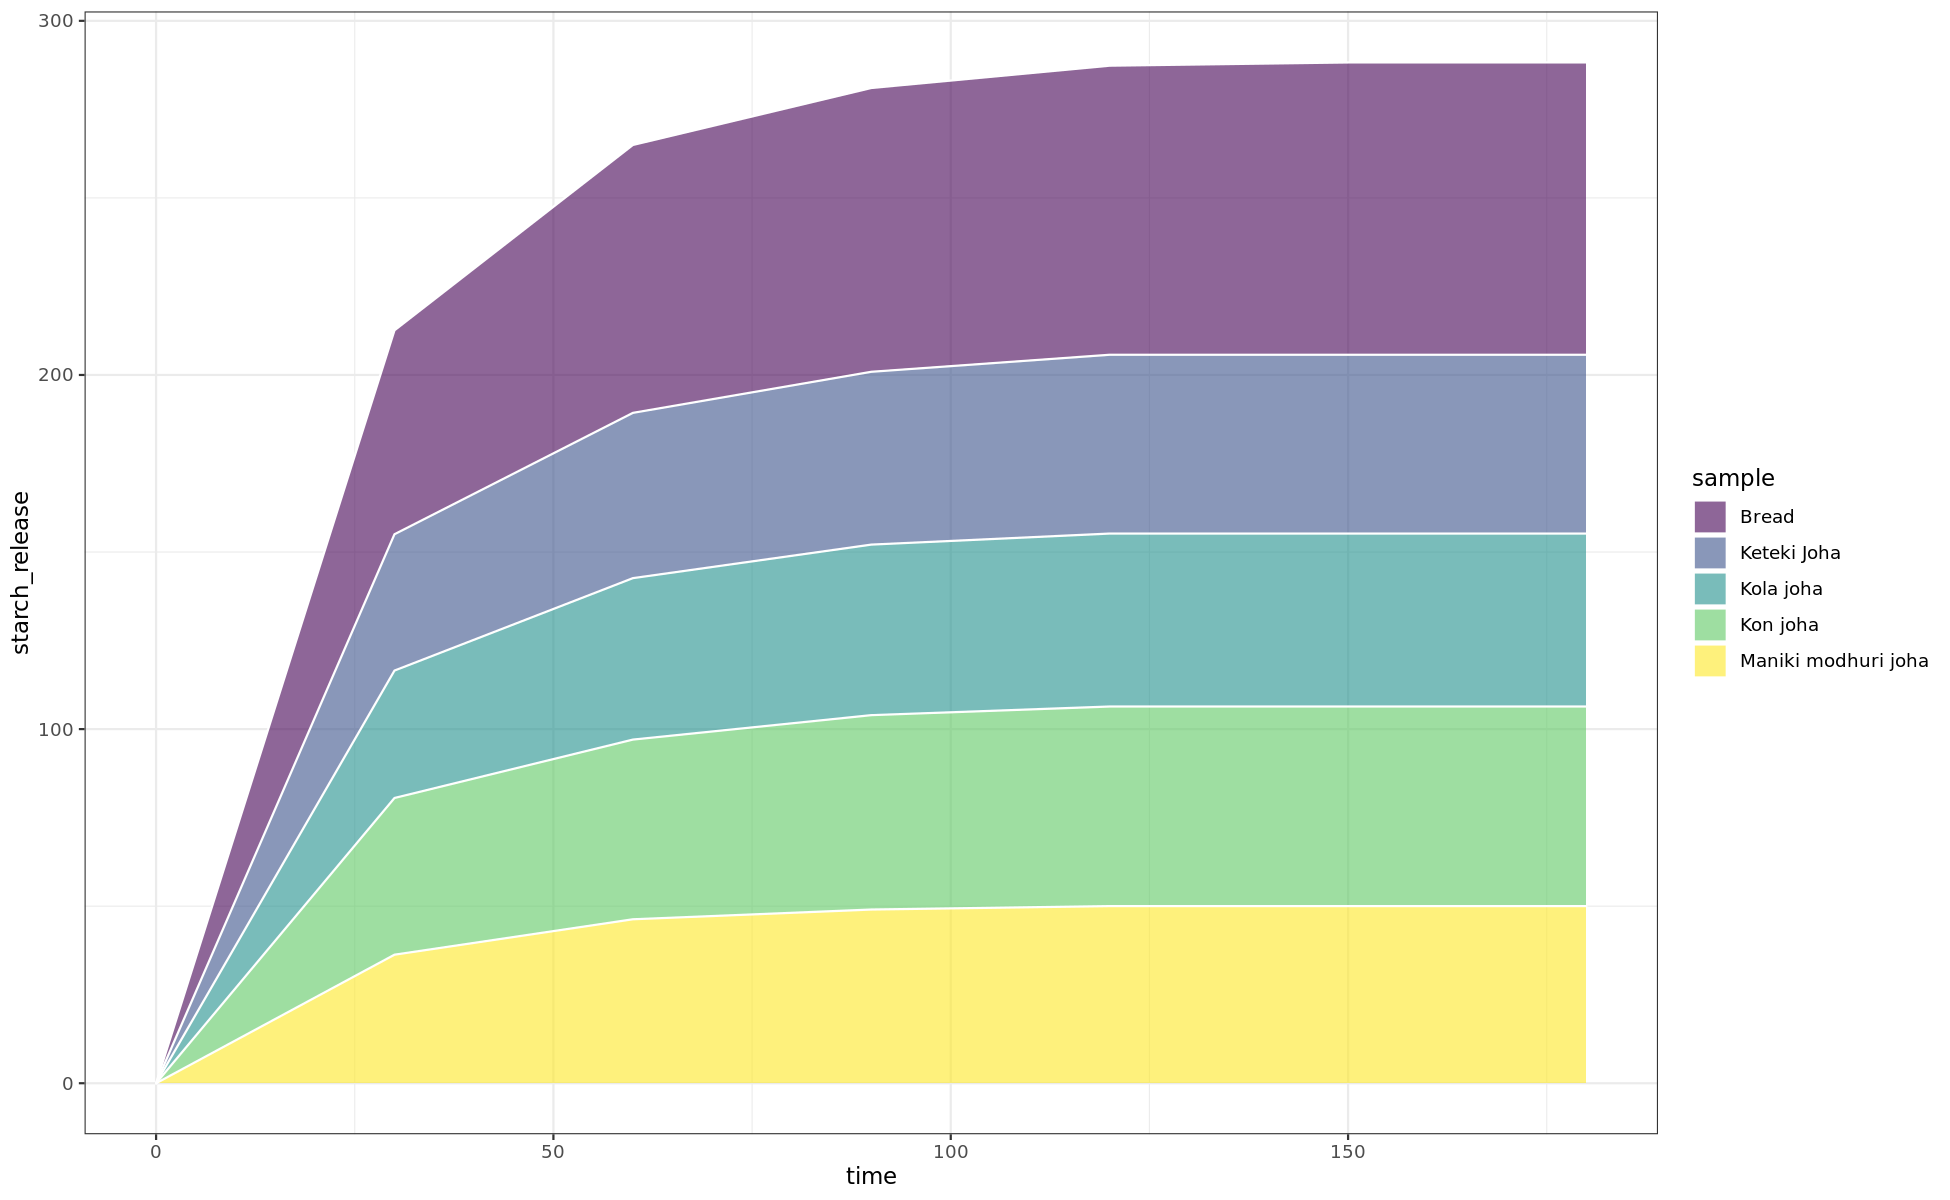

In [20]:
options(repr.plot.width = 13, repr.plot.height = 8, repr.plot.res = 150)
ggplot(hydrolysis_data, aes(x=time, y=starch_release, fill=sample)) + 
  geom_area(alpha=0.6 , size=.5, colour="white") +
  scale_fill_viridis(discrete = T) + 
  theme_bw() 

Verify the structure of hydrolysis data

In [11]:
str(hydrolysis_data)

'data.frame':	35 obs. of  3 variables:
 $ time          : int  0 30 60 90 120 150 180 0 30 60 ...
 $ sample        : chr  "Bread" "Bread" "Bread" "Bread" ...
 $ starch_release: num  0 57.6 75.7 80.1 81.6 ...


### Calculate the Log Values using First order kinetic model

In [14]:
suppressMessages(library(dplyr))

In [15]:
hydrolysis_data_log = hydrolysis_data %>% 
  group_by(sample) %>% 
  mutate(log_fit = -log(1 - starch_release/max(starch_release))) %>%
  filter(is.finite(log_fit) == TRUE) %>%
  select(sample, time, log_fit)

In [16]:
hydrolysis_data_log

sample,time,log_fit
<chr>,<int>,<dbl>
Bread,0,0.000000
Bread,30,1.196008
Bread,60,2.483212
Bread,90,3.537814
Bread,120,4.507594
Kon joha,0,0.000000
Kon joha,30,1.537728
Kon joha,60,2.305428
Kon joha,90,3.646497


### Plot the kinetic models

`geom_smooth()` using formula 'y ~ x'



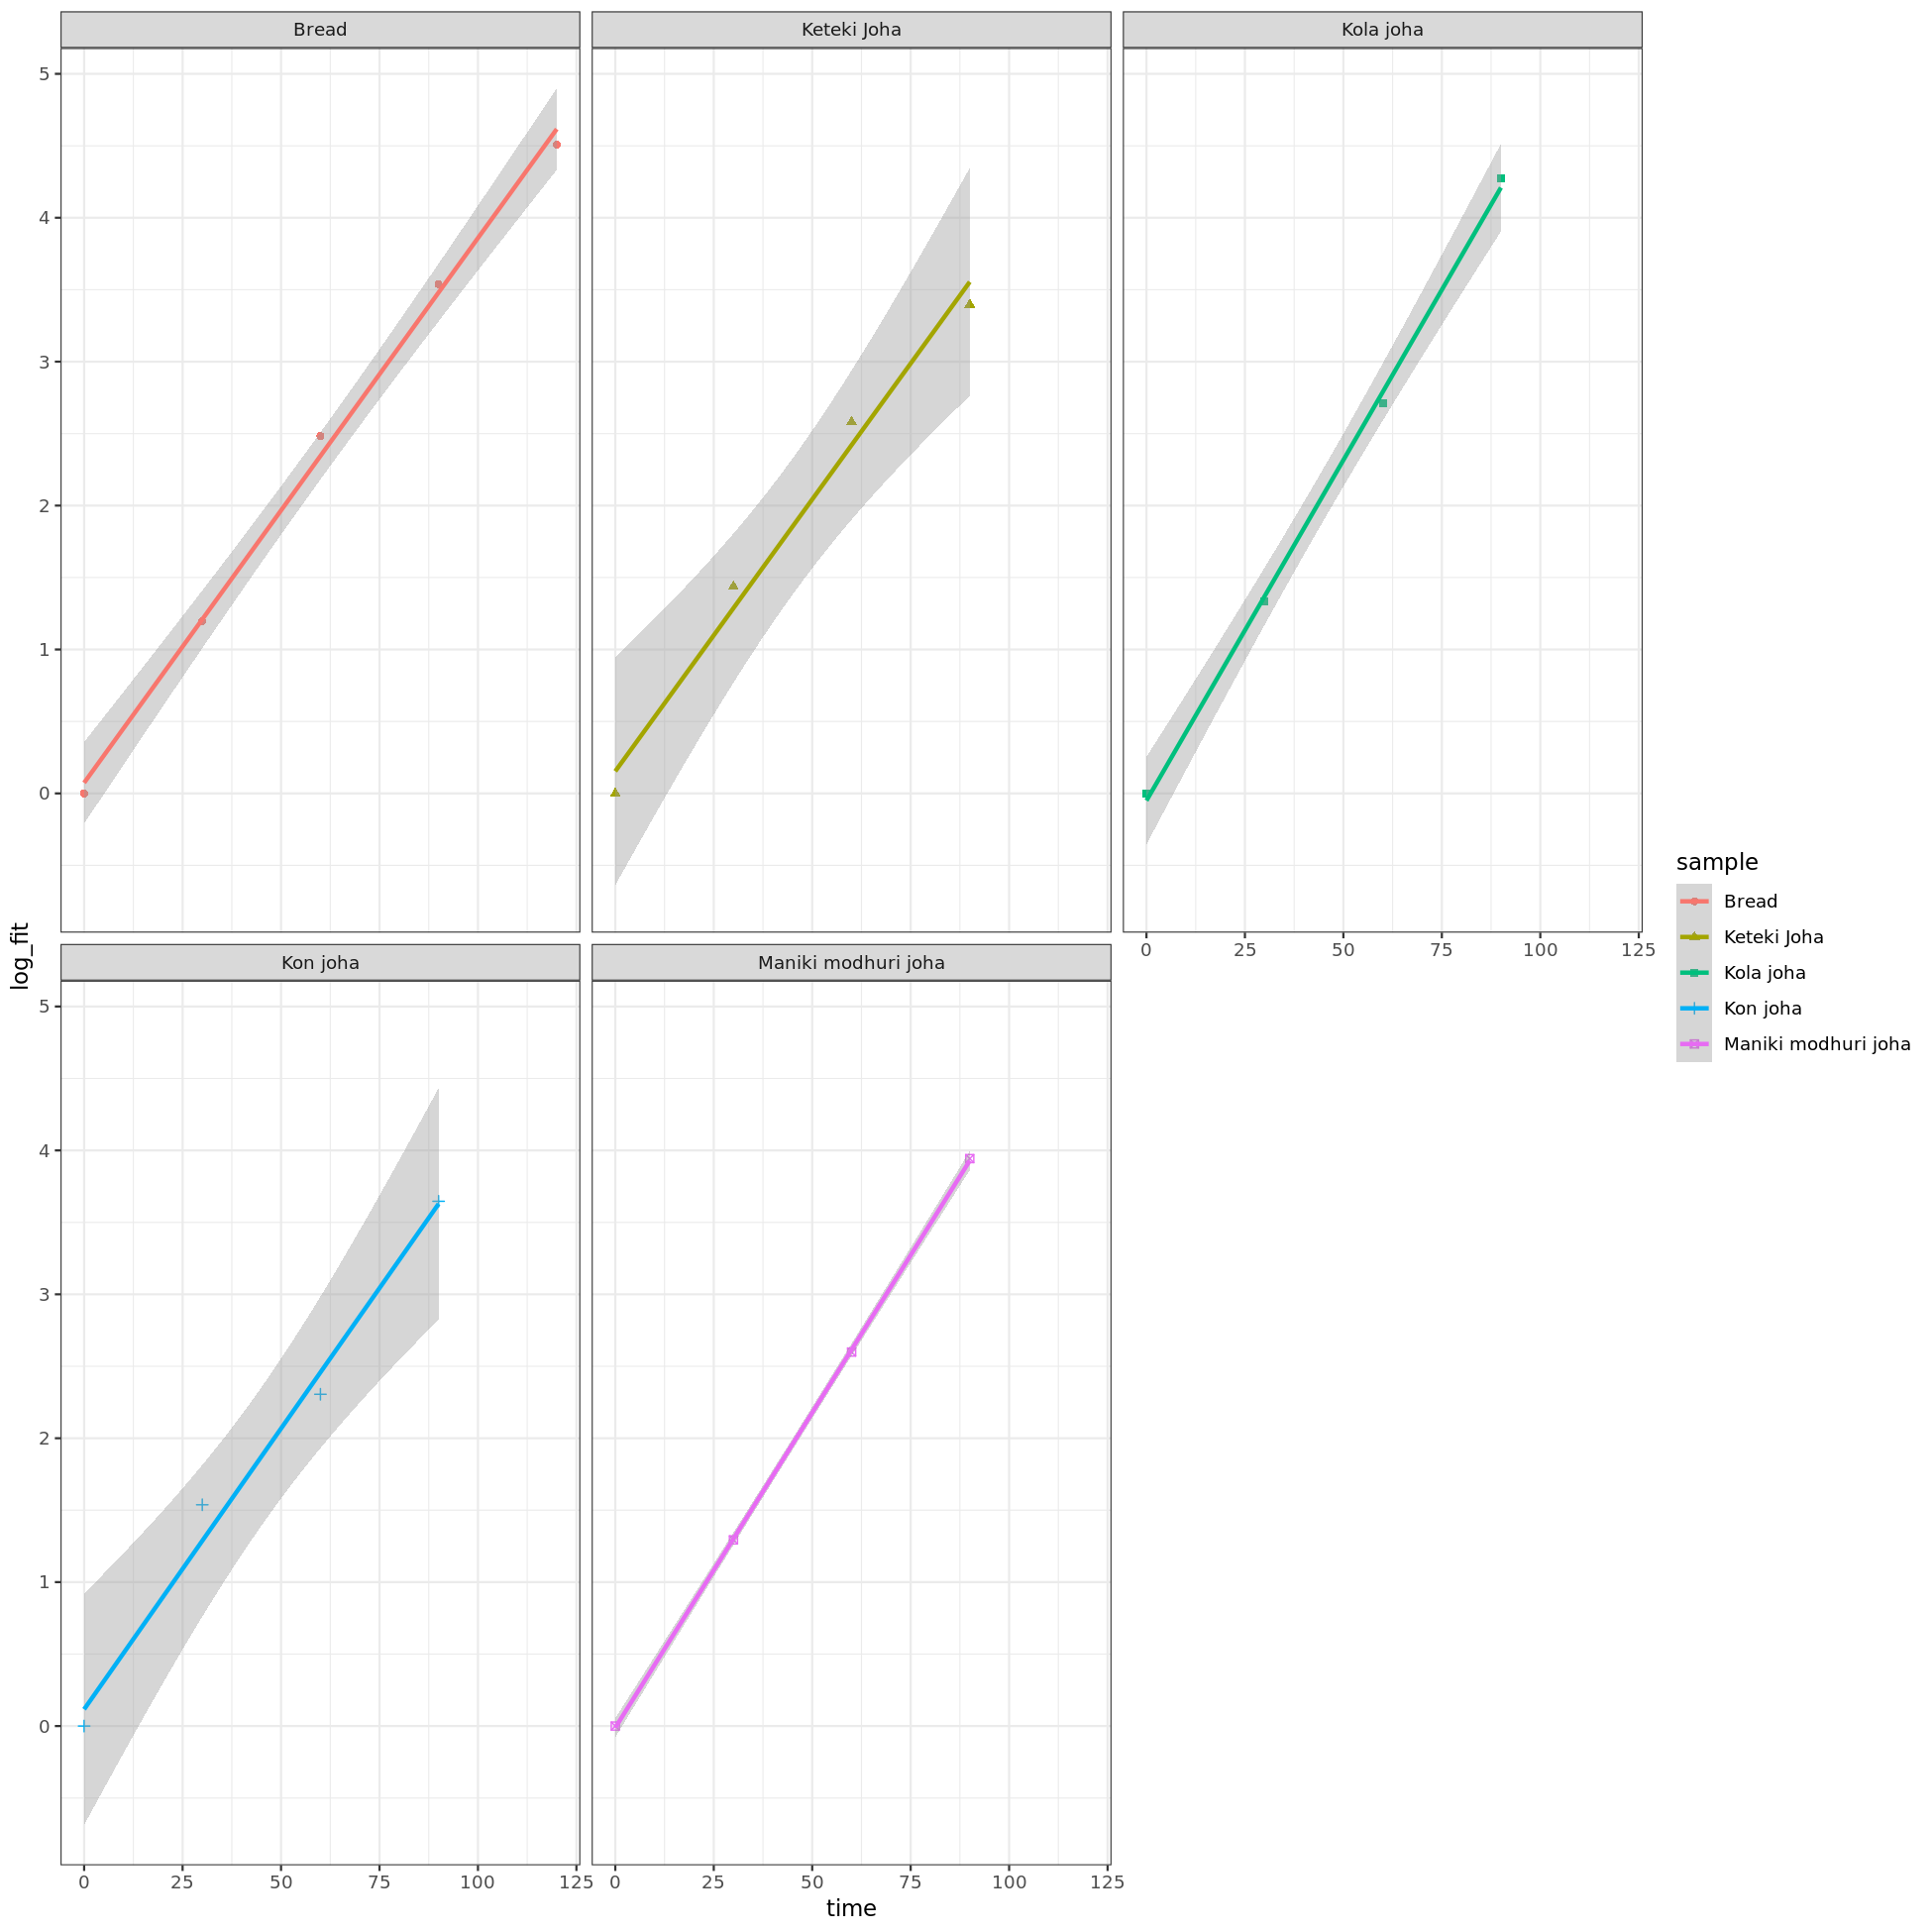

In [17]:
options(repr.plot.width = 13, repr.plot.height = 13, repr.plot.res = 150)
ggplot(hydrolysis_data_log, aes(x=time, y=log_fit, color=sample)) + 
  geom_point(aes(shape = sample)) +
  stat_smooth(method = "lm") +
  facet_wrap(~sample) + # Separate plots
  theme_bw()

### Get the starch equibrilium % and sequibrilium time in different table

In [21]:
starch_equilibrium = hydrolysis_data %>% group_by(sample) %>% slice(which.max(starch_release))

In [22]:
starch_equilibrium

time,sample,starch_release
<int>,<chr>,<dbl>
150,Bread,82.54
120,Keteki Joha,50.49
120,Kola joha,48.84
120,Kon joha,56.36
120,Maniki modhuri joha,50.02


## Generate linear model list of starch hydrolysis kinetics in key-value pairs

In [23]:
suppressMessages(library(tidyr))

In [24]:
hydrolys_data_log_spread = hydrolysis_data_log %>% spread(sample, log_fit)

In [25]:
hydrolys_data_log_spread

time,Bread,Keteki Joha,Kola joha,Kon joha,Maniki modhuri joha
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.000000,0.000000,0.000000,0.000000,0.000000
30,1.196008,1.437702,1.334428,1.537728,1.293568
60,2.483212,2.581525,2.709895,2.305428,2.598699
90,3.537814,3.397047,4.274212,3.646497,3.942882
120,4.507594,NA,NA,NA,NA


In [27]:
fitted_models_list = apply(
  hydrolys_data_log_spread[, -1], # ignore first time column
  MARGIN = 2, # perform column wise operations
  FUN = function(x) {
    lm(log_fit ~ time, data.frame(time = hydrolys_data_log_spread$time, log_fit = x))
  }
)

In [28]:
fitted_models_list

$Bread

Call:
lm(formula = log_fit ~ time, data = data.frame(time = hydrolys_data_log_spread$time, 
    log_fit = x))

Coefficients:
(Intercept)         time  
    0.07353      0.03786  


$`Keteki Joha`

Call:
lm(formula = log_fit ~ time, data = data.frame(time = hydrolys_data_log_spread$time, 
    log_fit = x))

Coefficients:
(Intercept)         time  
    0.15382      0.03778  


$`Kola joha`

Call:
lm(formula = log_fit ~ time, data = data.frame(time = hydrolys_data_log_spread$time, 
    log_fit = x))

Coefficients:
(Intercept)         time  
   -0.05008      0.04733  


$`Kon joha`

Call:
lm(formula = log_fit ~ time, data = data.frame(time = hydrolys_data_log_spread$time, 
    log_fit = x))

Coefficients:
(Intercept)         time  
    0.11633      0.03902  


$`Maniki modhuri joha`

Call:
lm(formula = log_fit ~ time, data = data.frame(time = hydrolys_data_log_spread$time, 
    log_fit = x))

Coefficients:
(Intercept)         time  
   -0.01128      0.04378  



## Generate Output Table containing time_equilibrium, conc_equilibrium, rates, and intercepts

In [29]:
out_table = starch_equilibrium %>% group_by(sample) %>%
  mutate(intercept = as.numeric(coef(fitted_models_list[[ sample]])[1])) %>%
  mutate(rate = as.numeric(coef(fitted_models_list[[ sample]])[2]))

In [30]:
out_table

time,sample,starch_release,intercept,rate
<int>,<chr>,<dbl>,<dbl>,<dbl>
150,Bread,82.54,0.07352704,0.03785664
120,Keteki Joha,50.49,0.15382406,0.03778321
120,Kola joha,48.84,-0.05008179,0.04732701
120,Kon joha,56.36,0.11633460,0.03902397
120,Maniki modhuri joha,50.02,-0.01127918,0.04377926


## Determine the Calculated Hydrolysis data according to the rate contant deduced

In [ ]:
#library(tidyr) # already imported

In [31]:
hydrolysis_data_spread = hydrolysis_data %>% spread(sample, starch_release)

In [32]:
#original experimental data
hydrolysis_data_spread

time,Bread,Keteki Joha,Kola joha,Kon joha,Maniki modhuri joha
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.00,0.00,0.00,0.00,0.00
30,57.58,38.50,35.98,44.25,36.30
60,75.65,46.67,45.59,50.74,46.30
90,80.14,48.80,48.16,54.89,49.05
120,81.63,50.49,48.84,56.36,50.02
150,82.54,50.49,48.84,56.36,50.02
180,82.54,50.49,48.84,56.36,50.02


Comparision of Experimental data with predicted data of hydrolysis of **Bread**

In [35]:
fo_conc_calc = function(C_EQ, k, t) {
    return (C_EQ * (1 - exp(-k*t)))
}

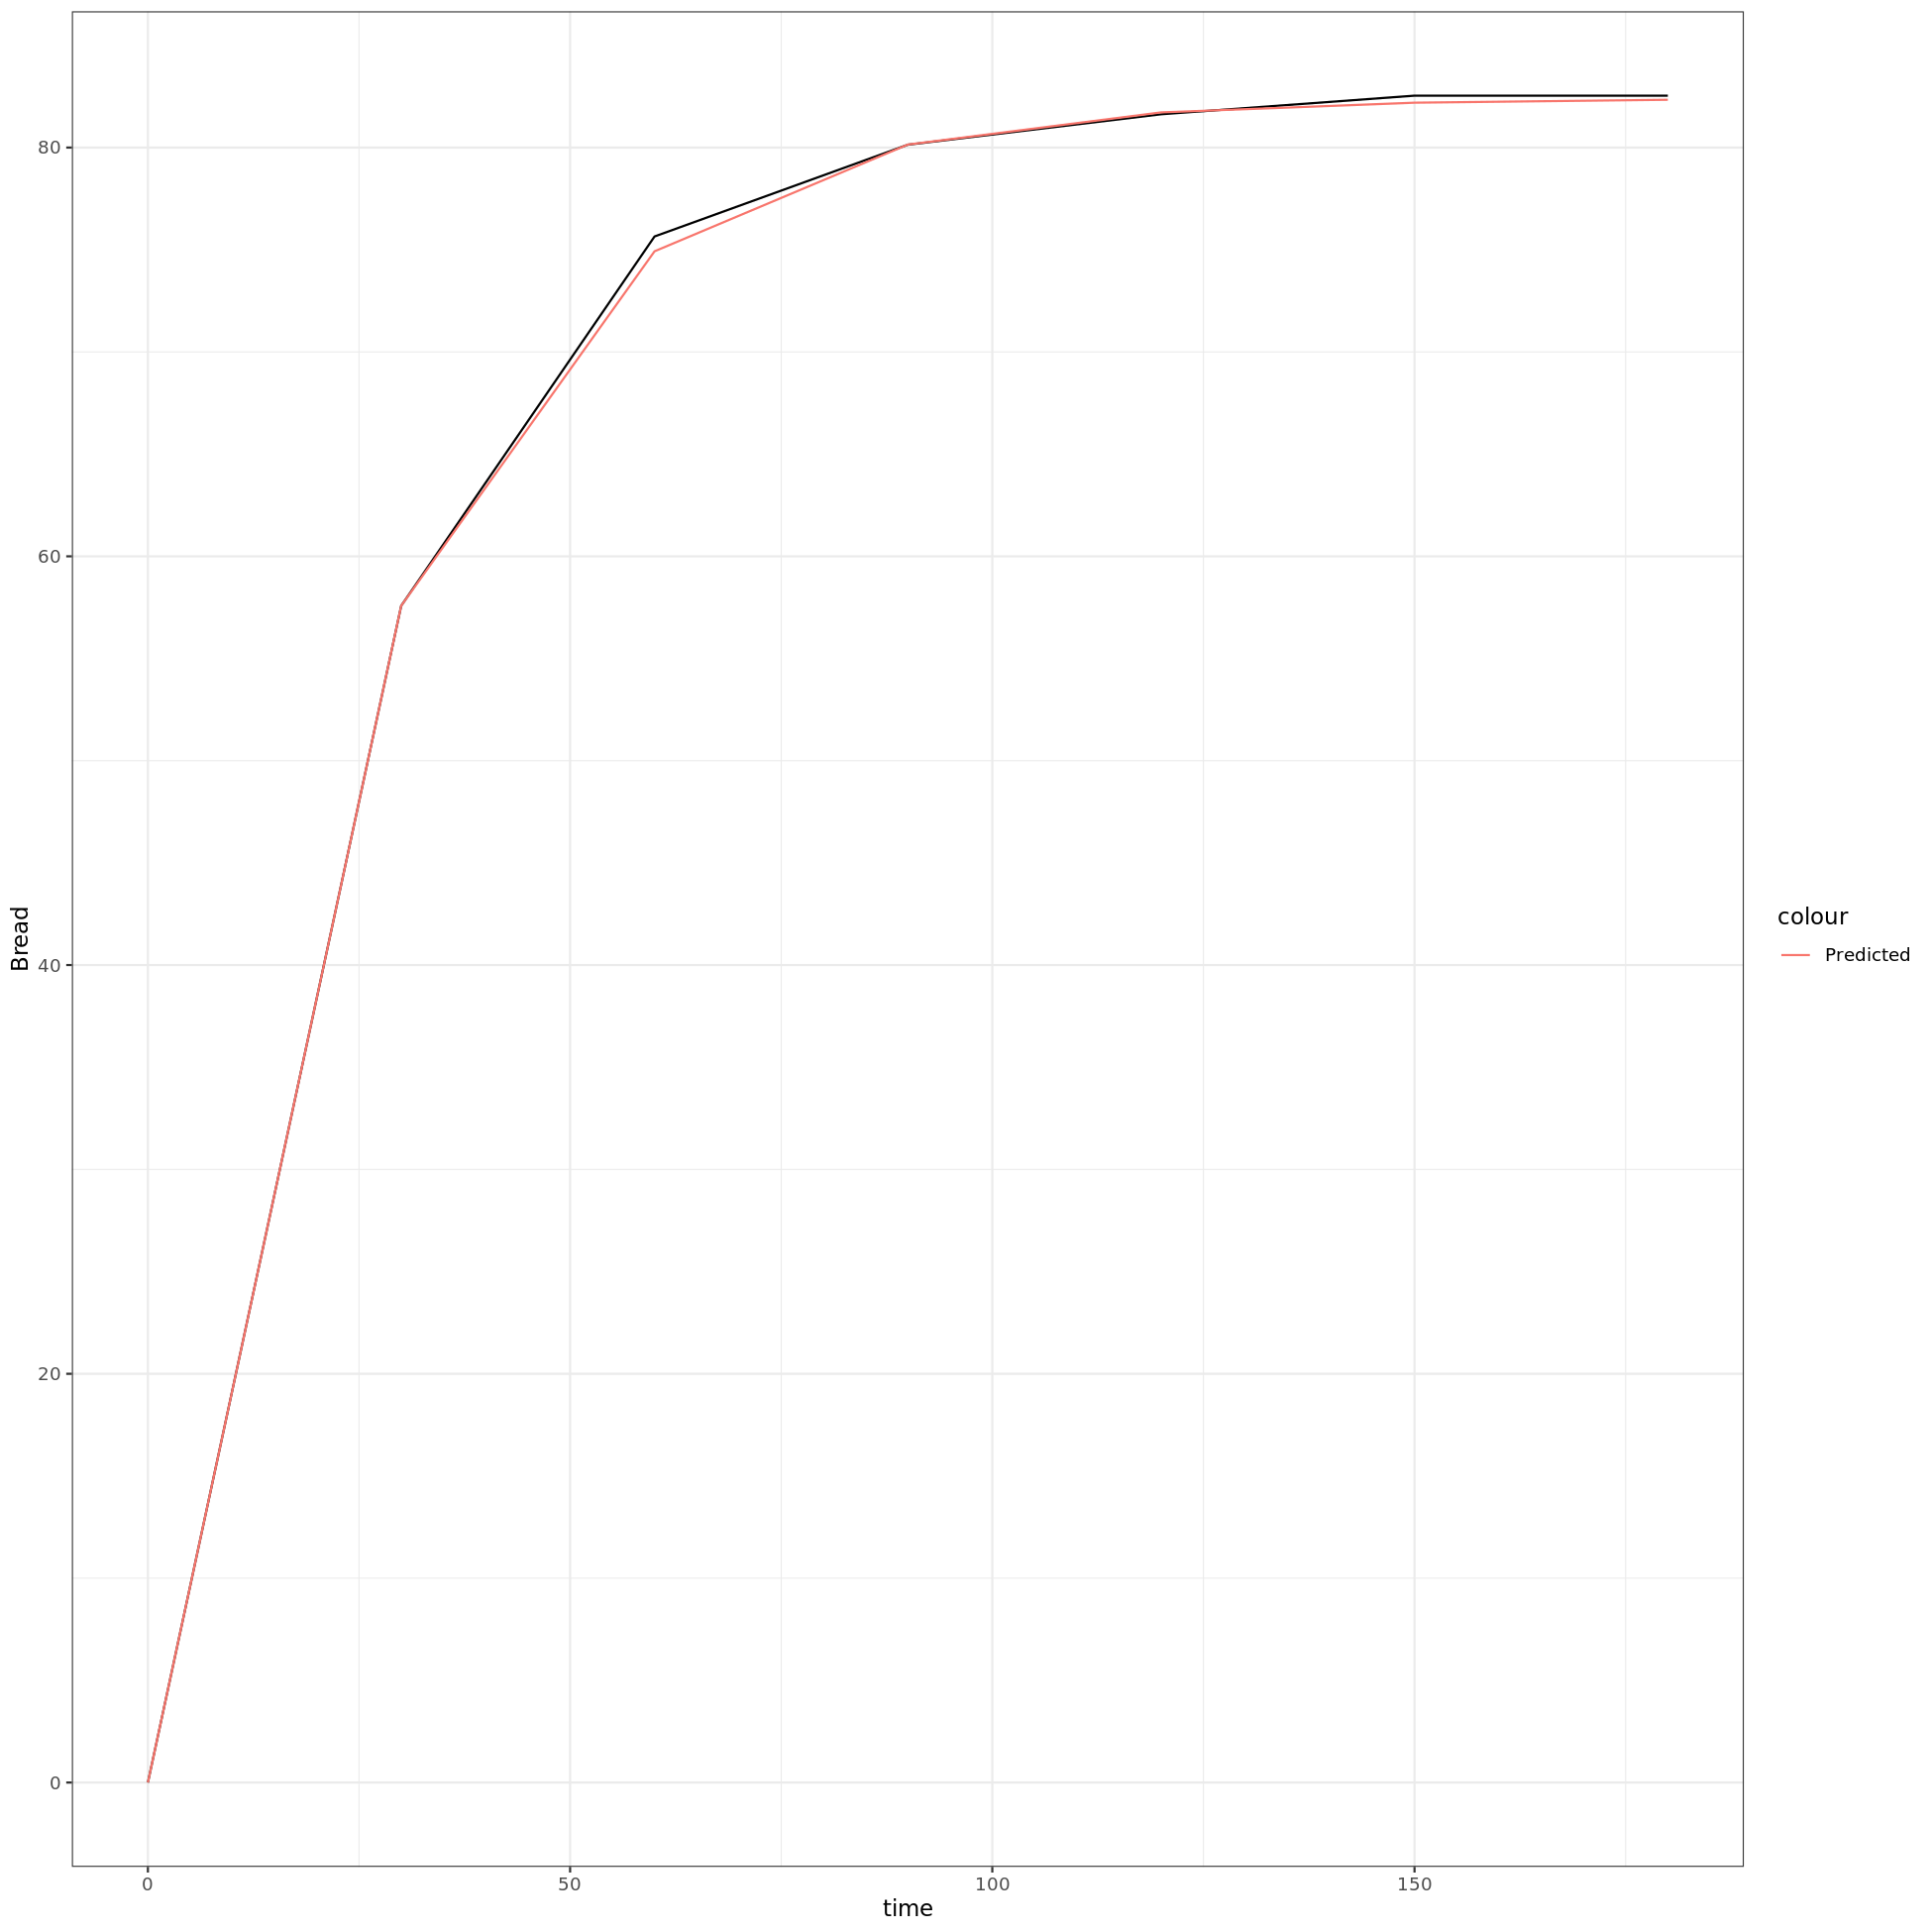

In [57]:
options(repr.plot.width = 13, repr.plot.height = 13, repr.plot.res = 150)
ggplot(data = hydrolysis_data_spread, aes(x=time)) +
  geom_line(aes(y=Bread)) +
  geom_line(
    aes(y = fo_conc_calc(82.4, 0.040, c(0, 30, 60, 90, 120, 150, 180)), color="Predicted")
) +
theme_bw()

## Add predicted log values to hydrolysis_data_log

In [58]:
hydrolysis_data_log = hydrolysis_data_log %>% do(modelr::add_predictions(., lm(log_fit ~ time, .)))

In [59]:
hydrolysis_data_log

sample,time,log_fit,pred
<chr>,<int>,<dbl>,<dbl>
Bread,0,0.000000,0.07352704
Bread,30,1.196008,1.20922636
Bread,60,2.483212,2.34492568
Bread,90,3.537814,3.48062500
Bread,120,4.507594,4.61632432
Keteki Joha,0,0.000000,0.15382406
Keteki Joha,30,1.437702,1.28732035
Keteki Joha,60,2.581525,2.42081664
Keteki Joha,90,3.397047,3.55431292


## Add predicted starch concentration 

First check the structures

In [37]:
str(hydrolysis_data)

'data.frame':	35 obs. of  3 variables:
 $ time          : int  0 30 60 90 120 150 180 0 30 60 ...
 $ sample        : chr  "Bread" "Bread" "Bread" "Bread" ...
 $ starch_release: num  0 57.6 75.7 80.1 81.6 ...


In [38]:
str(out_table)

tibble [5 × 5] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ time          : int [1:5] 150 120 120 120 120
 $ sample        : chr [1:5] "Bread" "Keteki Joha" "Kola joha" "Kon joha" ...
 $ starch_release: num [1:5] 82.5 50.5 48.8 56.4 50
 $ intercept     : num [1:5] 0.0735 0.1538 -0.0501 0.1163 -0.0113
 $ rate          : num [1:5] 0.0379 0.0378 0.0473 0.039 0.0438
 - attr(*, "groups")= tibble [5 × 2] (S3: tbl_df/tbl/data.frame)
  ..$ sample: chr [1:5] "Bread" "Keteki Joha" "Kola joha" "Kon joha" ...
  ..$ .rows : list<int> [1:5] 
  .. ..$ : int 1
  .. ..$ : int 2
  .. ..$ : int 3
  .. ..$ : int 4
  .. ..$ : int 5
  .. ..@ ptype: int(0) 
  ..- attr(*, ".drop")= logi TRUE


In [60]:
hydrolysis_data = hydrolysis_data %>% group_by(sample) %>% 
  mutate(pred = fo_conc_calc(
    as.numeric(out_table[out_table$sample %in% sample, "starch_release"]),
    as.numeric(out_table[out_table$sample %in% sample, "rate"]),
    time
#    as.numeric(levels(time))[time] # converts factor to numeric value
  ))

In [40]:
hydrolysis_data

time,sample,starch_release,pred
<int>,<chr>,<dbl>,<dbl>
0,Bread,0.00,0.00000
30,Bread,57.58,56.02836
60,Bread,75.65,74.02453
90,Bread,80.14,79.80485
120,Bread,81.63,81.66148
150,Bread,82.54,82.25782
180,Bread,82.54,82.44936
0,Kon joha,0.00,0.00000
30,Kon joha,44.25,38.88029


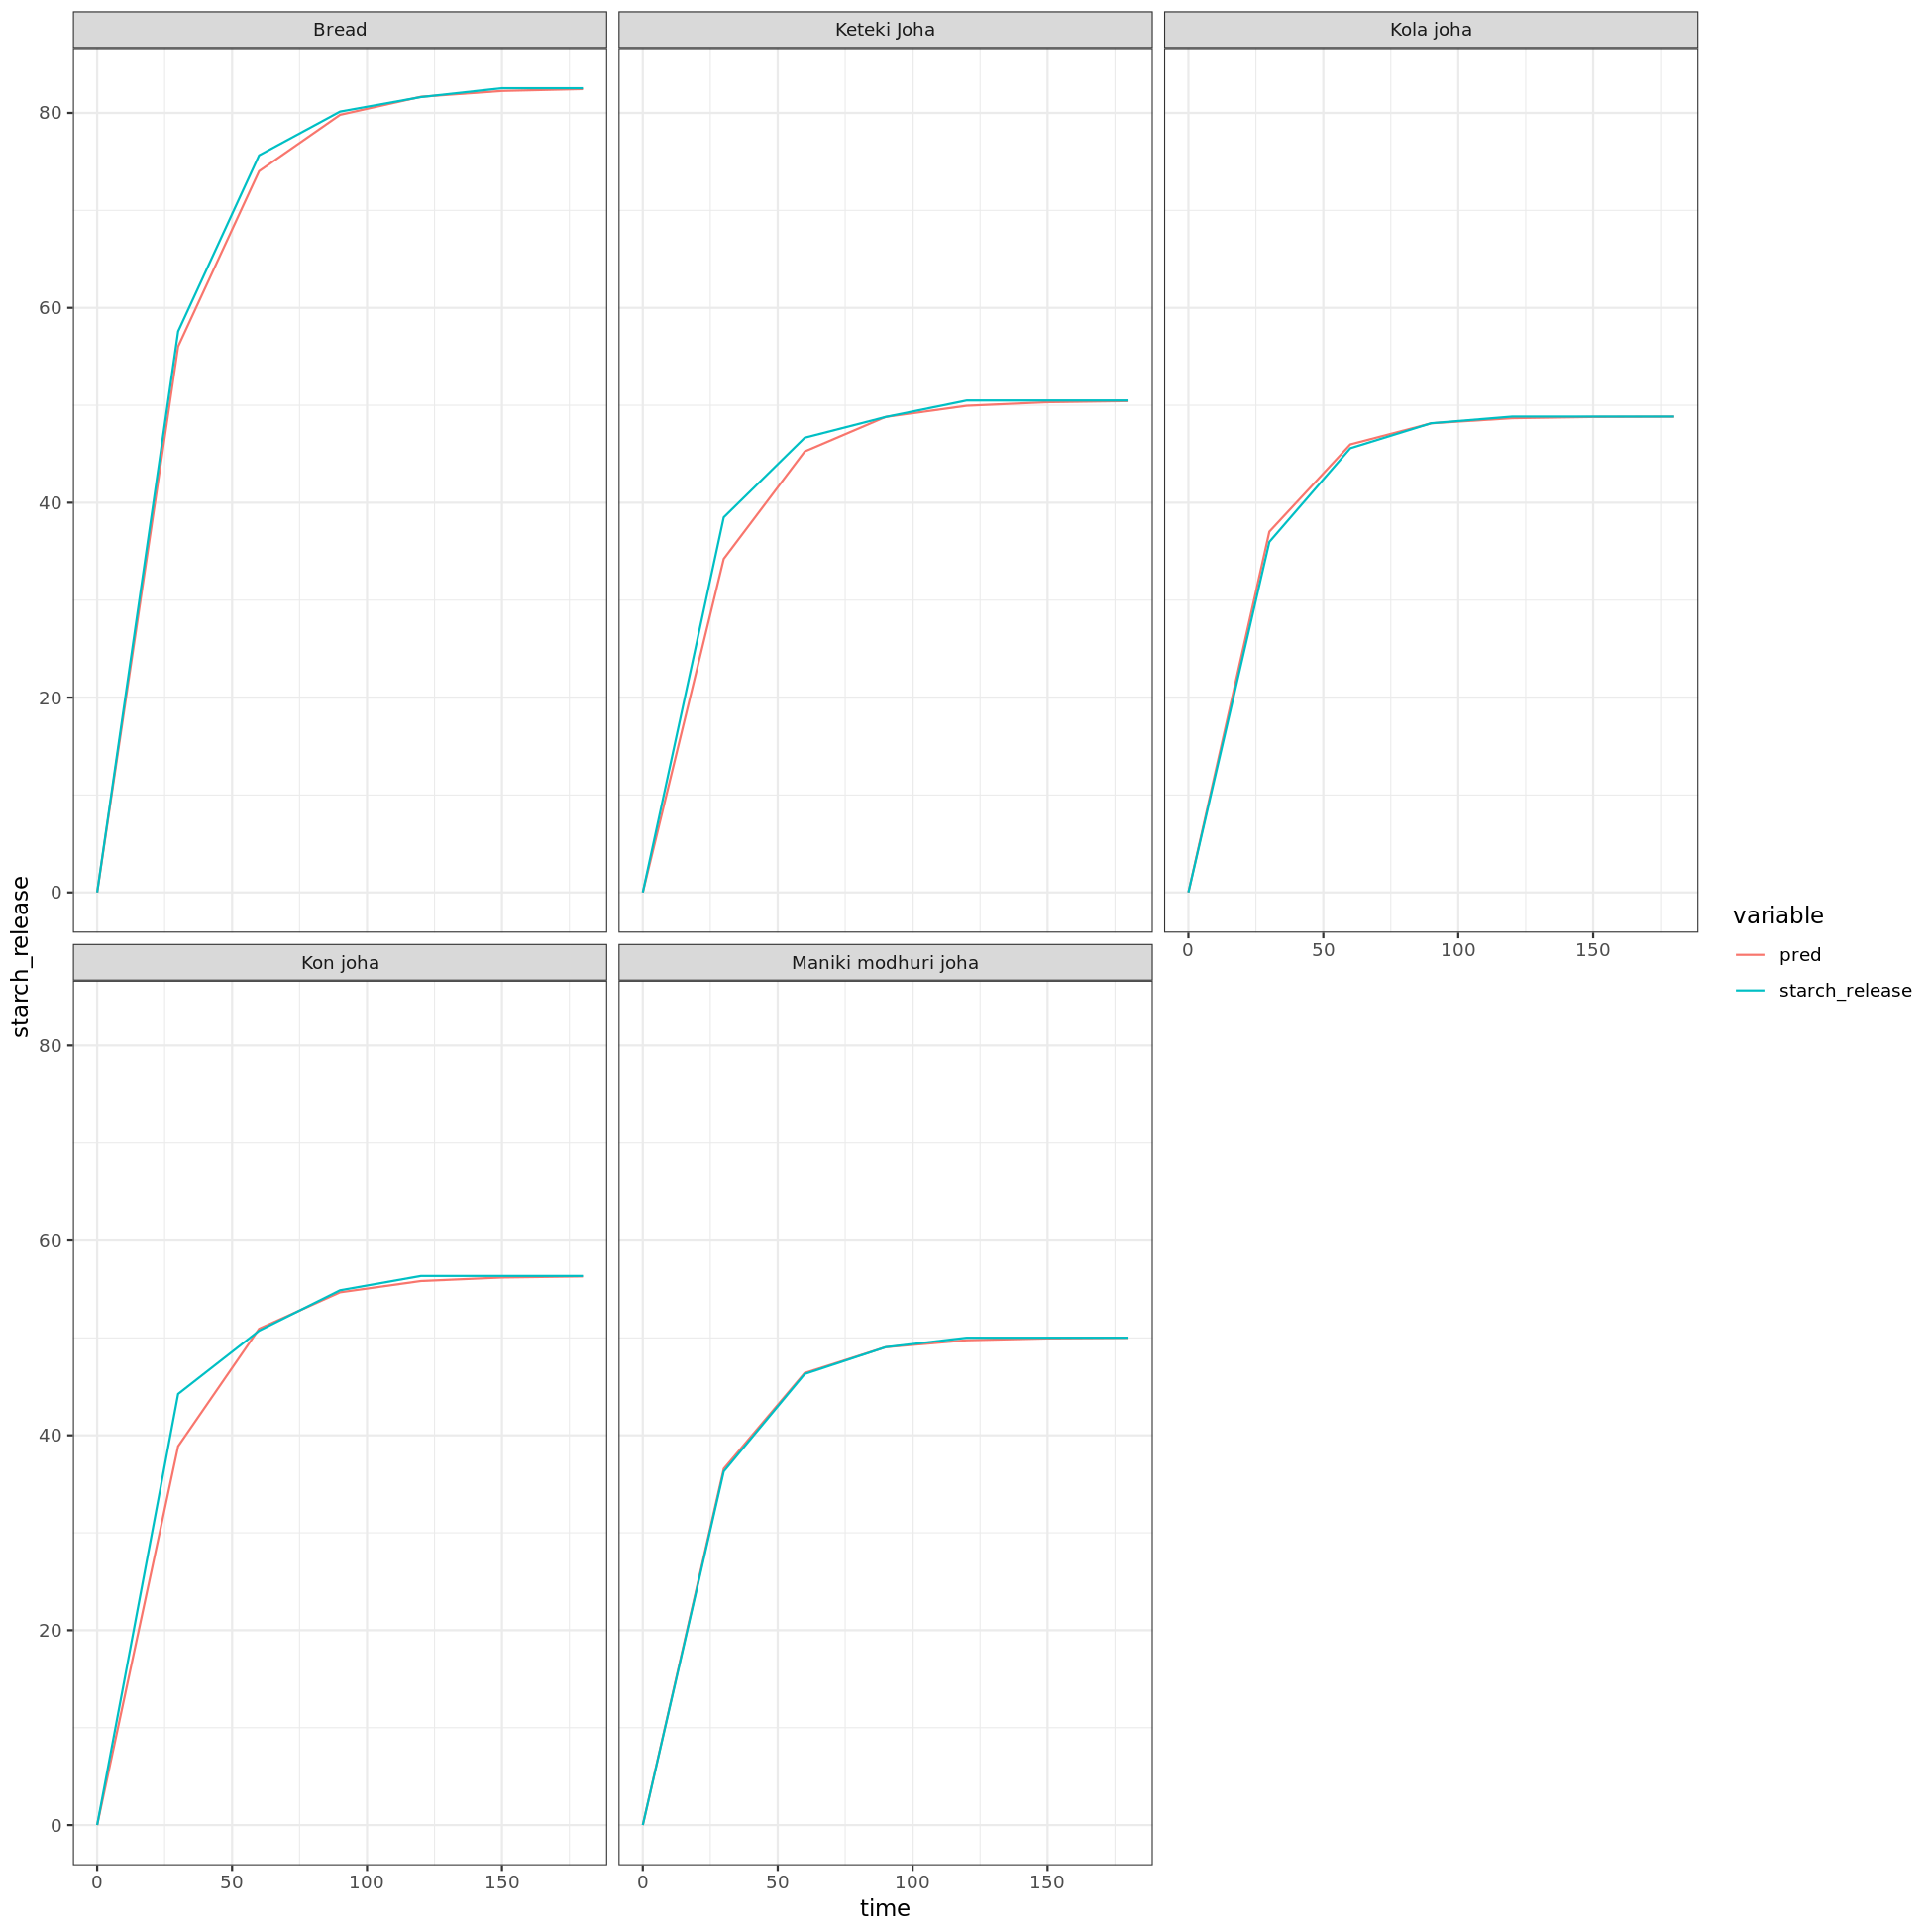

In [41]:
hydrolysis_data_melted = hydrolysis_data %>%  gather(key = "variable", value="starch_release", c(-sample, -time))
ggplot(data = hydrolysis_data_melted, aes(x=time, y=starch_release)) +
    geom_line(aes(color=variable)) +
    facet_wrap(~sample) +
    theme_bw()

## View the plots by rate constant for analysis and trimming unneeded data poins which are kind of outliers

In [43]:
suppressMessages(library(mosaic))

In [46]:
f = makeFun(C_EQ * (1 - exp(-k*t)) ~ t)

In [47]:
out_table = out_table %>% group_by(sample) %>%
  mutate(auc = integrate(f, C_EQ = starch_release, k = rate, lower = 0, upper = 180)[[1]])

In [48]:
out_table

time,sample,starch_release,intercept,rate,auc
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
150,Bread,82.54,0.07352704,0.03785664,12679.264
120,Keteki Joha,50.49,0.15382406,0.03778321,7753.379
120,Kola joha,48.84,-0.05008179,0.04732701,7759.437
120,Kon joha,56.36,0.11633460,0.03902397,8701.845
120,Maniki modhuri joha,50.02,-0.01127918,0.04377926,7861.482


## Calculate Hydrolysis index - as Goni et al, and Grandfield et al reffreing to AUC of Bread

In [49]:
auc_bread = as.numeric(out_table[out_table$sample %in% "Bread", "auc"])
auc_bread_goni = integrate(f, C_EQ = 78.19, k = 0.04, lower = 0, upper = 180)[[1]]

In [50]:
out_table = out_table %>% group_by(sample) %>%
  mutate(hi = auc*100/auc_bread)

In [51]:
out_table

time,sample,starch_release,intercept,rate,auc,hi
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
150,Bread,82.54,0.07352704,0.03785664,12679.264,100.00000
120,Keteki Joha,50.49,0.15382406,0.03778321,7753.379,61.15007
120,Kola joha,48.84,-0.05008179,0.04732701,7759.437,61.19785
120,Kon joha,56.36,0.11633460,0.03902397,8701.845,68.63052
120,Maniki modhuri joha,50.02,-0.01127918,0.04377926,7861.482,62.00267


## eGI values - Goni et al

In [52]:
out_table = out_table %>% group_by(sample) %>%
  mutate(egi_goni = 39.71 + 0.549 * hi)

## eGI values - Grandfield et al

In [53]:
out_table = out_table %>% group_by(sample) %>%
  mutate(egi_grandfield = 8.198 + 0.862 * hi)

In [54]:
out_table

time,sample,starch_release,intercept,rate,auc,hi,egi_goni,egi_grandfield
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
150,Bread,82.54,0.07352704,0.03785664,12679.264,100.00000,94.61000,94.39800
120,Keteki Joha,50.49,0.15382406,0.03778321,7753.379,61.15007,73.28139,60.90936
120,Kola joha,48.84,-0.05008179,0.04732701,7759.437,61.19785,73.30762,60.95055
120,Kon joha,56.36,0.11633460,0.03902397,8701.845,68.63052,77.38816,67.35751
120,Maniki modhuri joha,50.02,-0.01127918,0.04377926,7861.482,62.00267,73.74947,61.64430


## Use fololowing code to export as CSV

In [ ]:
#write.csv(out_table,"../datasets/experimental/karabee_GI_output_table.csv", row.names = FALSE)